# MÍNIMOS QUADRADOS

Vamos considerar um conjunto de dados experimentais

Loading required package: repr


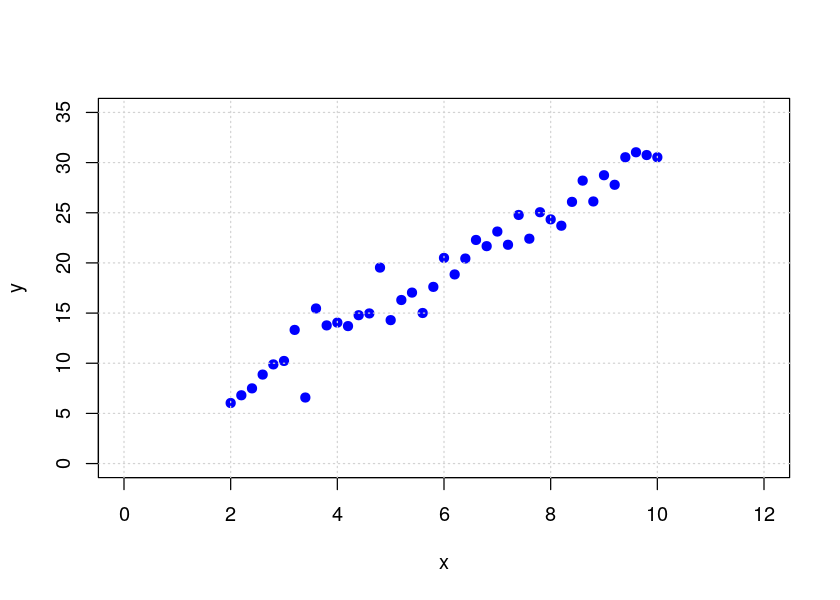

In [1]:
# Utilizado apenas para reduzir tamanho dos gráficos
require(repr)
options(repr.plot.width=7, repr.plot.height=5)

x <- seq(2, 10, by=0.2)
y <- 3*x + 1 +rnorm(n=length(x), mean=0, sd=2)

plot(x,y, col=4, pch=19, xlim=c(0,12), ylim=c(0,35))
grid()

Digamos que y depende linearmente de x, ou seja, buscamos uma reta que passa pelos pontos. Mas qual reta? 

Note que é impossível passar exatamente por todos os pontos por uma reta. Só seria possível passar por todos os pontos utilizando um polinômio de ordem elevada, mas será que isso é razoável? 

Deve-se tomar muito cuidado com *overfitting*. A física do problema em questão é muito importante. Neste caso sabemos que y varia com x de maneira linear. Devido às incertezas de medição e simplificações inerentes do modelo matemático, os pontos não passam exatamente por uma reta. Há ruído.

Qual seria uma maneira razoável de escolher uma reta? 

Com o método dos mínimos quadrados o que se busca é minimizar o erro entre a curva escolhida e os pontos de medição.

$$Erro: \qquad \varepsilon(a_0, a_1) = \sum_{i=1}^N [(a_0+a_1x_i)-y_i]^2 $$

Minimizar o erro corresponde a fazer

$$ \frac{\partial\varepsilon}{\partial a_0} = \frac{\partial\varepsilon}{\partial a_1} = 0 $$

Mas podemos pensar no problema de outra forma.

<u>**Sob a óptica da álgebra linear**</u>
    
O problema pode ser pensado como um problema de projeção

Conforme visto em sala, pode-se encontrar a matriz projeção

$$ P = A(A^TA)^{-1}A^T $$

e pode-se encontar os melhores coeficientes fazendo 

$$ A v = b \qquad com \qquad v = [a_0~a_1]^T $$

ou seja,

\begin{equation*}
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
1 & x_3 \\
\vdots & \vdots \\
1 & x_n
\end{bmatrix} \begin{bmatrix}
a_0 \\
a_1
\end{bmatrix} = \begin{bmatrix}
y_1 \\
y_2 \\
y_3 \\
\vdots \\
y_n
\end{bmatrix}
\end{equation*}

In [2]:
# Criando matrizes
A <- cbind(rep(1, length(x)), x)
b <- cbind(y)

AtA <- t(A)%*%A
Atb <- t(A)%*%b

v <- solve(a=AtA, b=Atb)

,y
,1.155583
x,2.996636


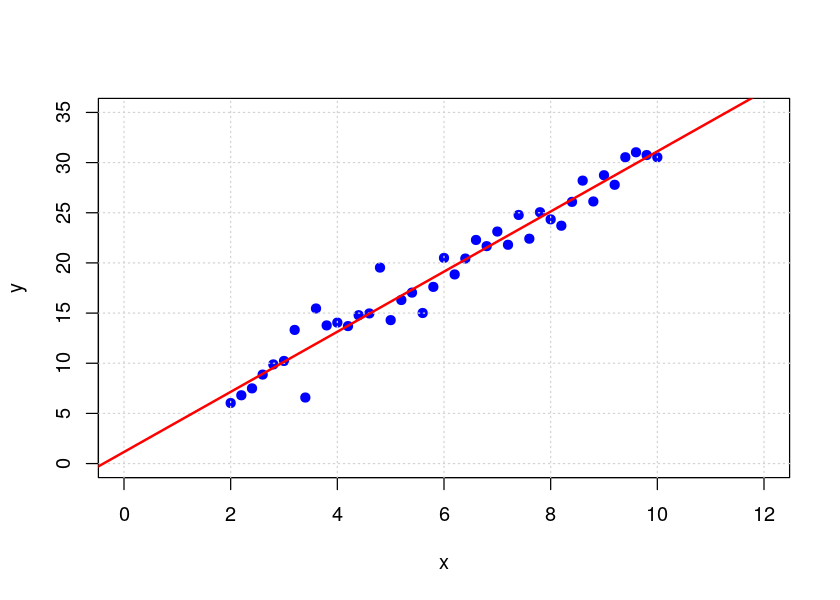

In [3]:
v
plot(x,y, col=4, pch=19, xlim=c(0,12), ylim=c(0,35))
grid()
abline(a=v[1], b=v[2], col=2, lwd=2)

O mesmo pode ser feito com a função *lm*

In [4]:
v2 <- lm(y~x)
v2



Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
      1.156        2.997  


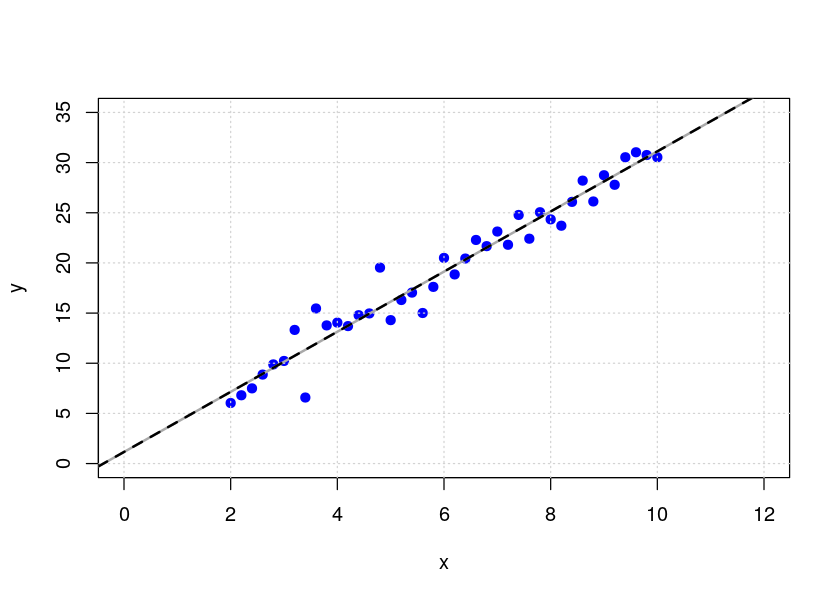

In [5]:
plot(x,y, col=4, pch=19, xlim=c(0,12), ylim=c(0,35))
grid()
abline(a=v[1], b=v[2], col='darkgray', lwd=2)
abline(a=v2$coefficients[1], b=v2$coefficients[2], col=1, lwd=2, lty=2)